In [1]:
# Import many dataFrame for the Algorithm Comparison:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
from scipy import stats

import glob
import os

# internal imports
import fixation_plots as plots
import math_calc


In [2]:
counter = 14
tracker_type = "lb"

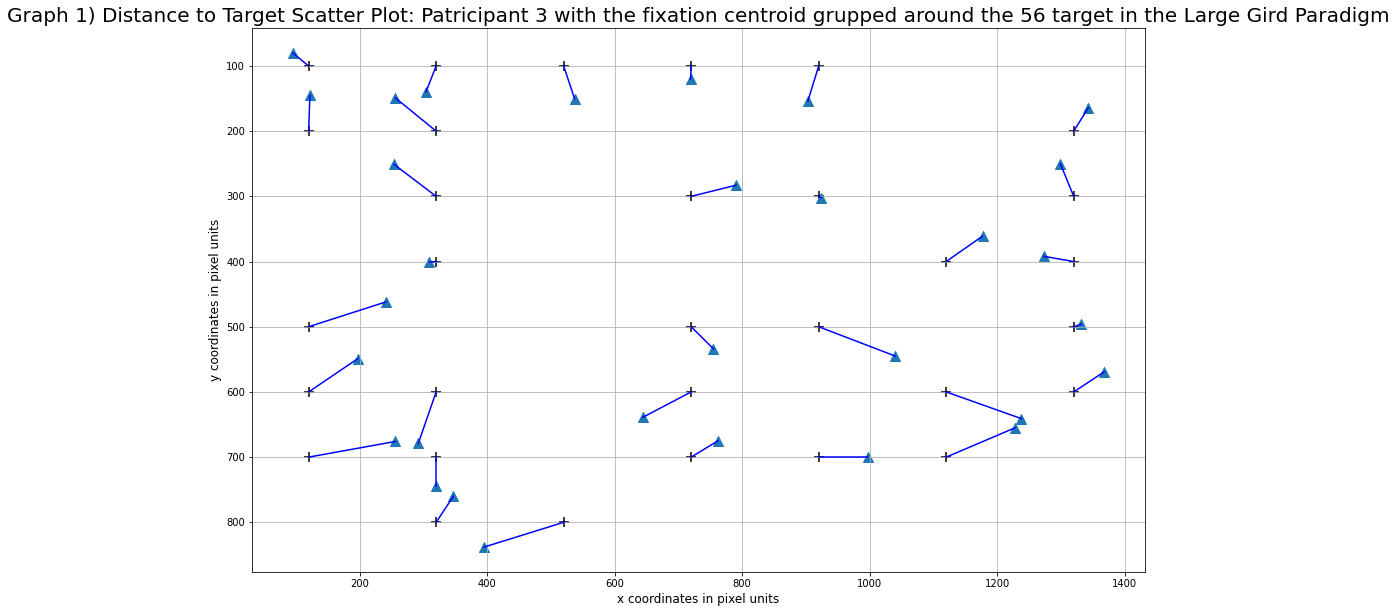

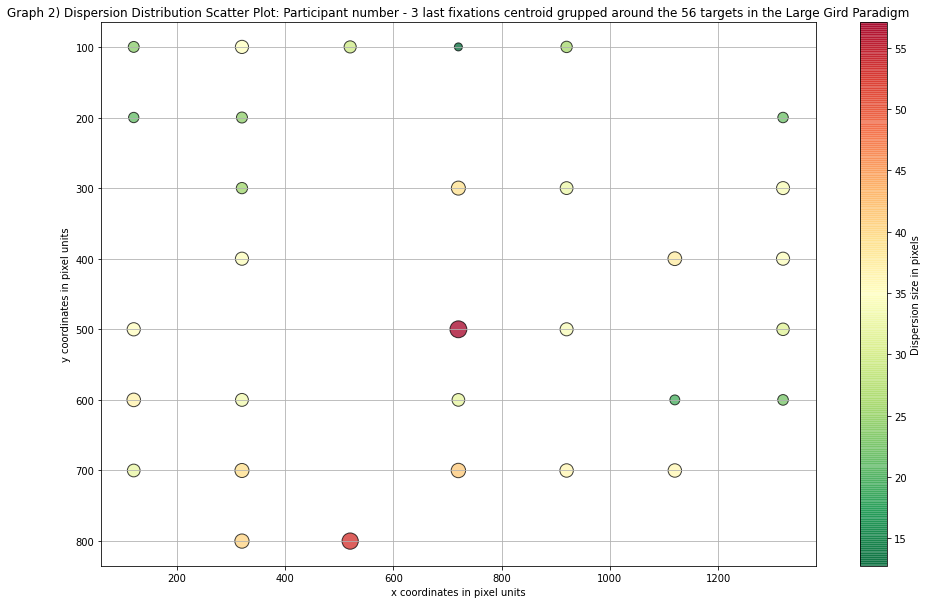

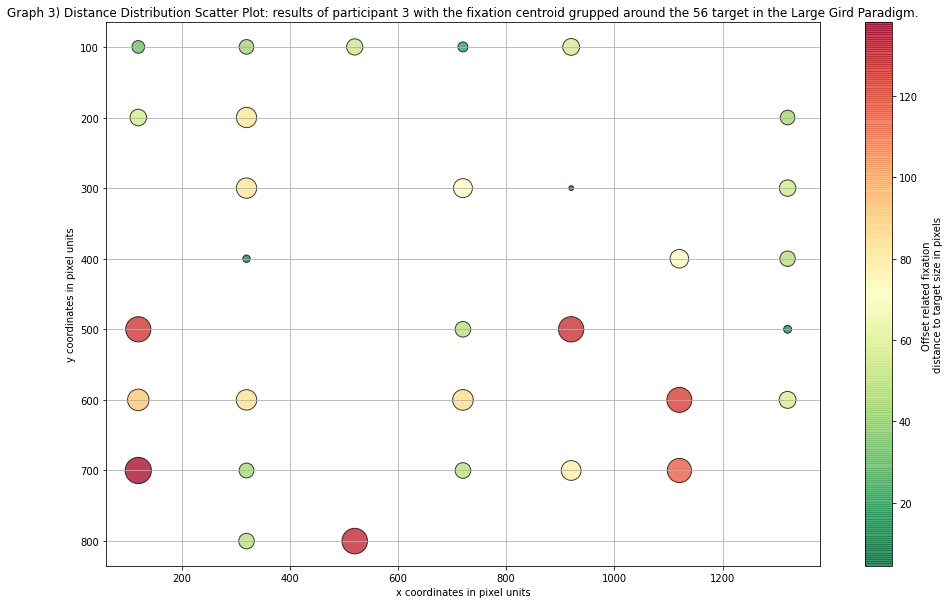

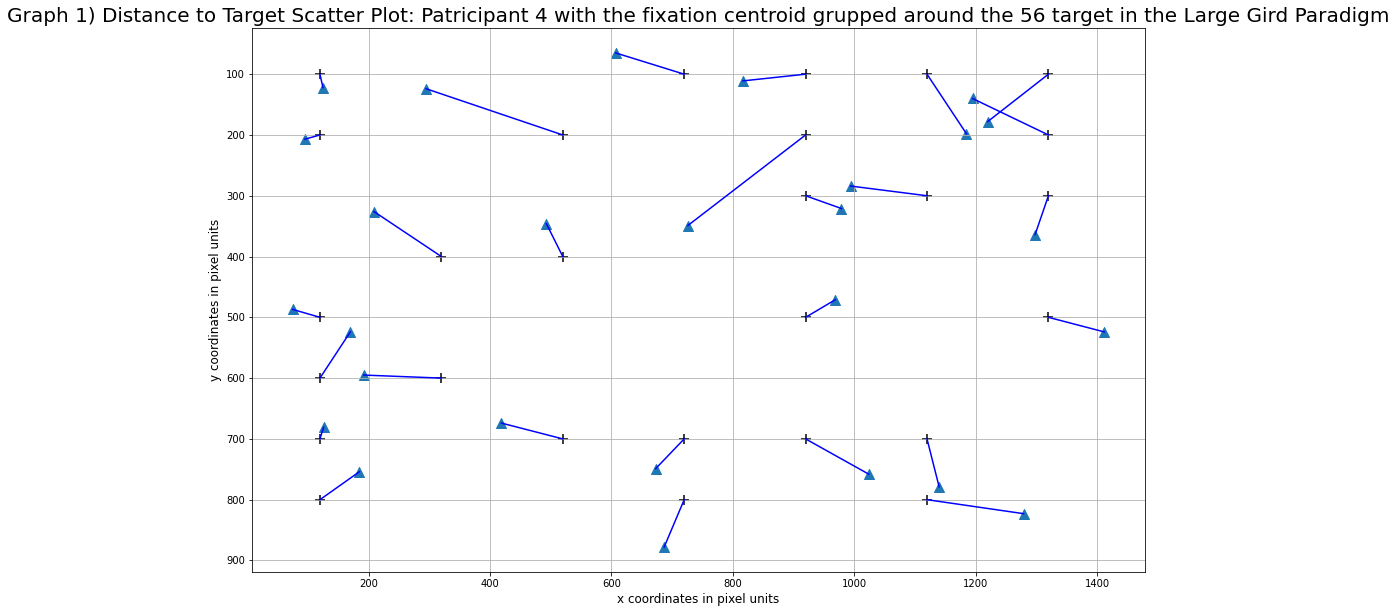

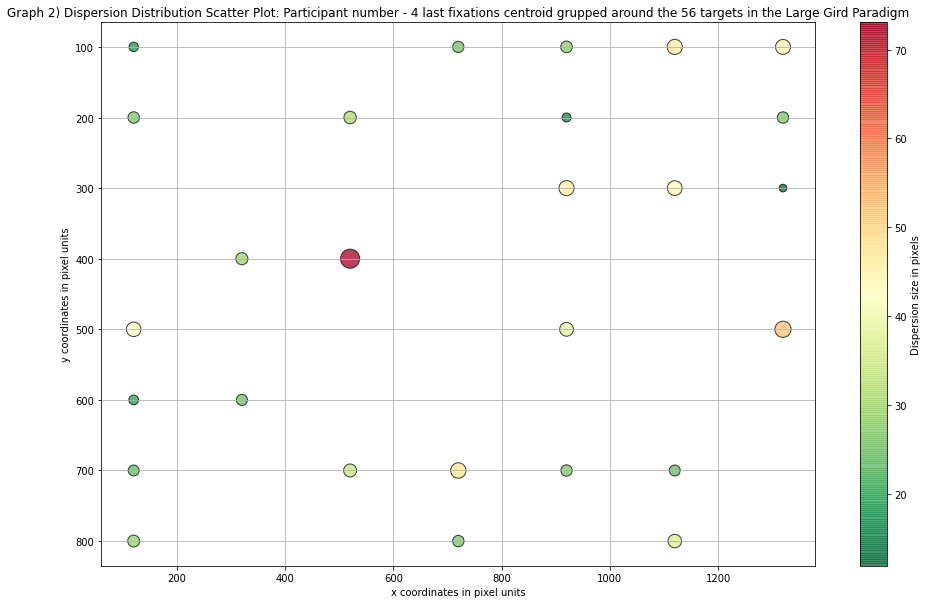

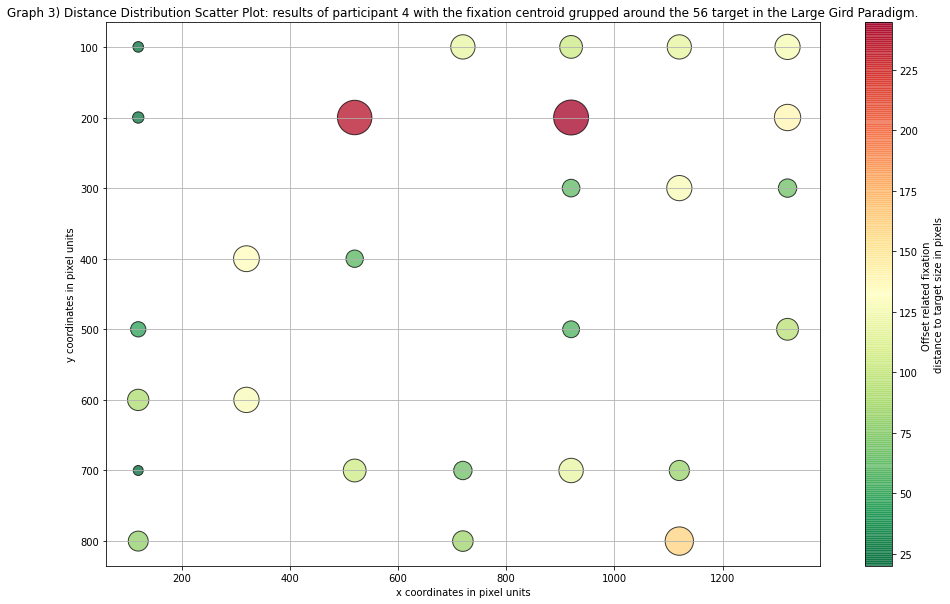

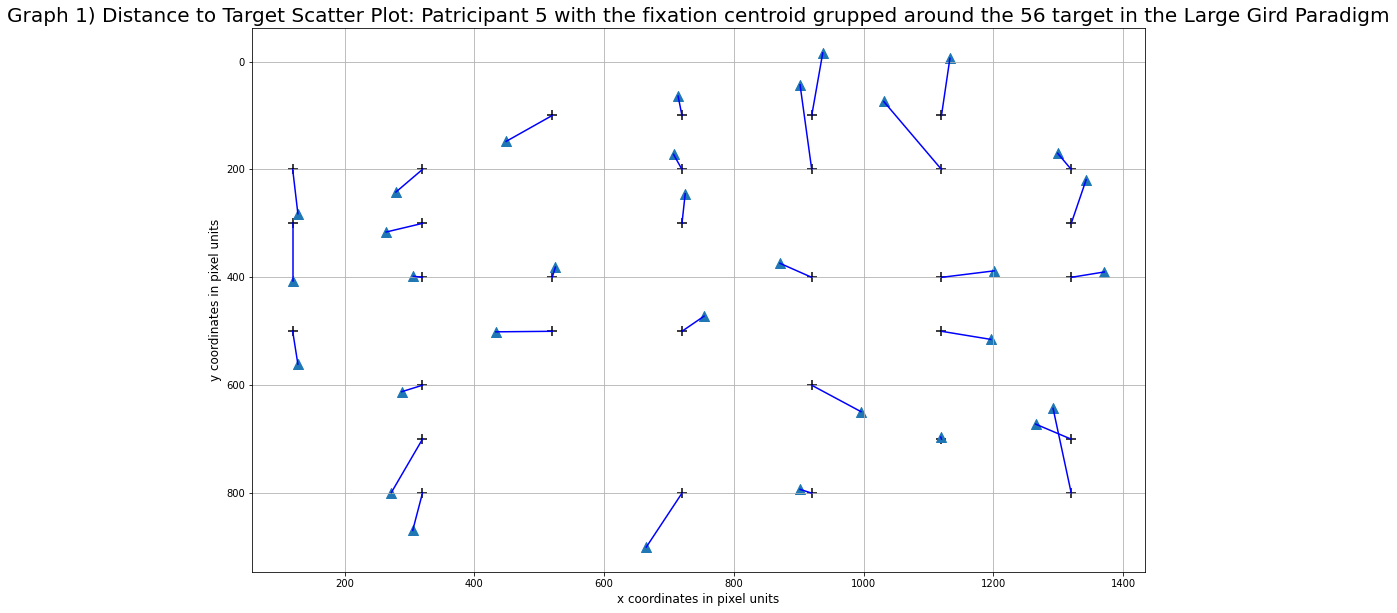

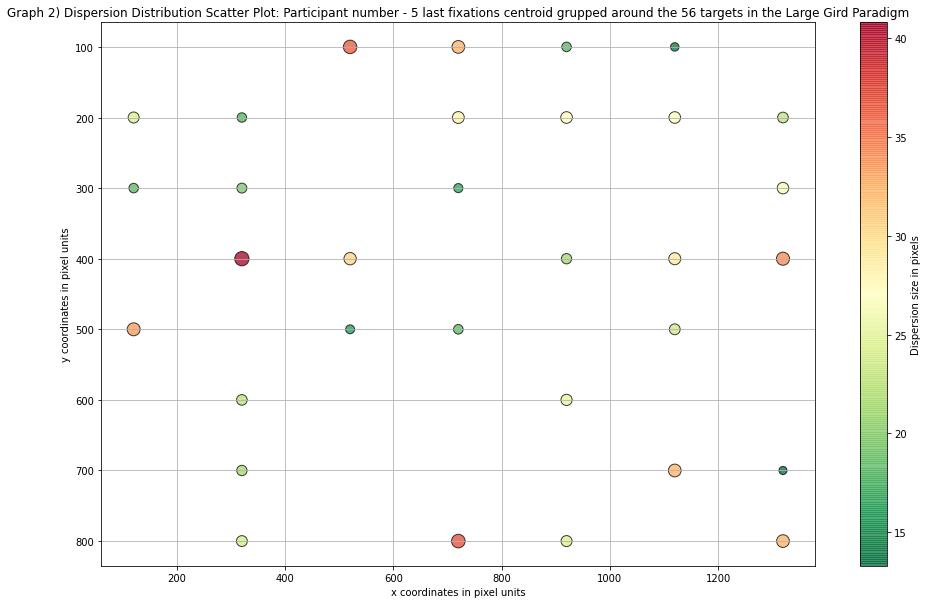

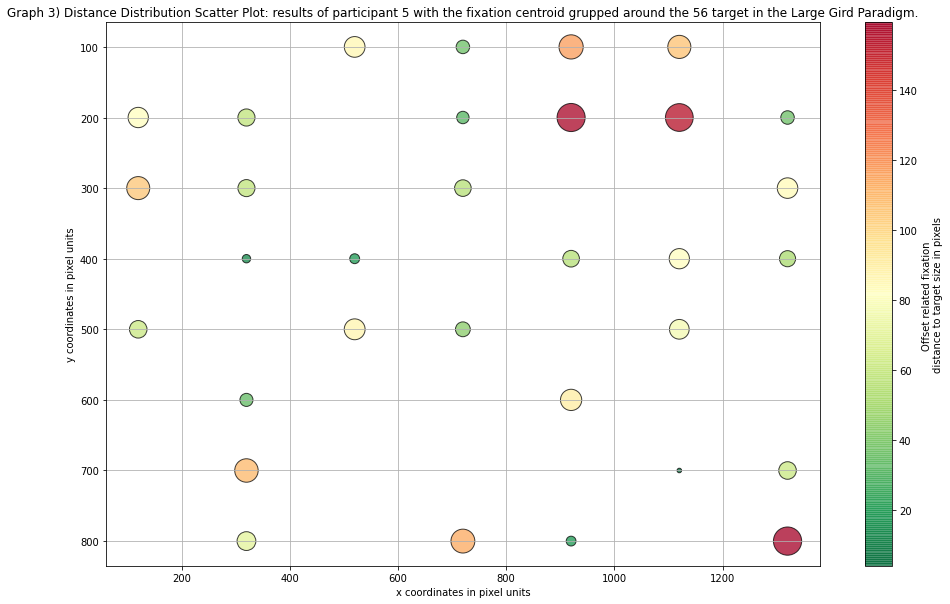

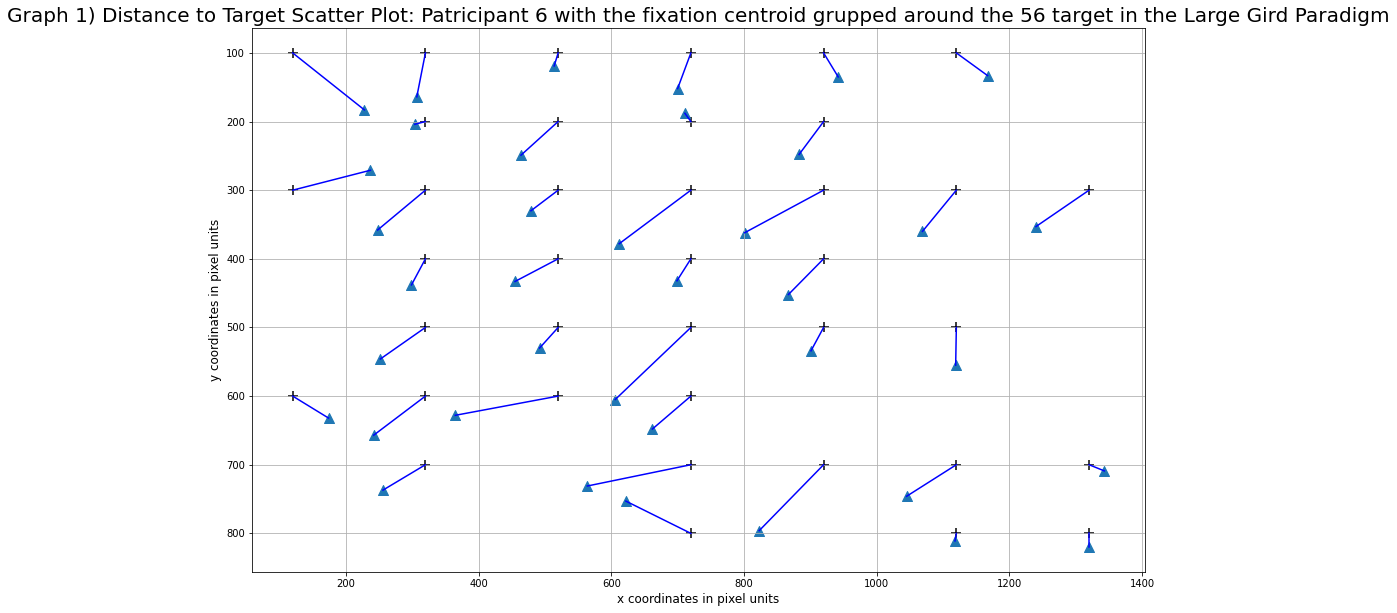

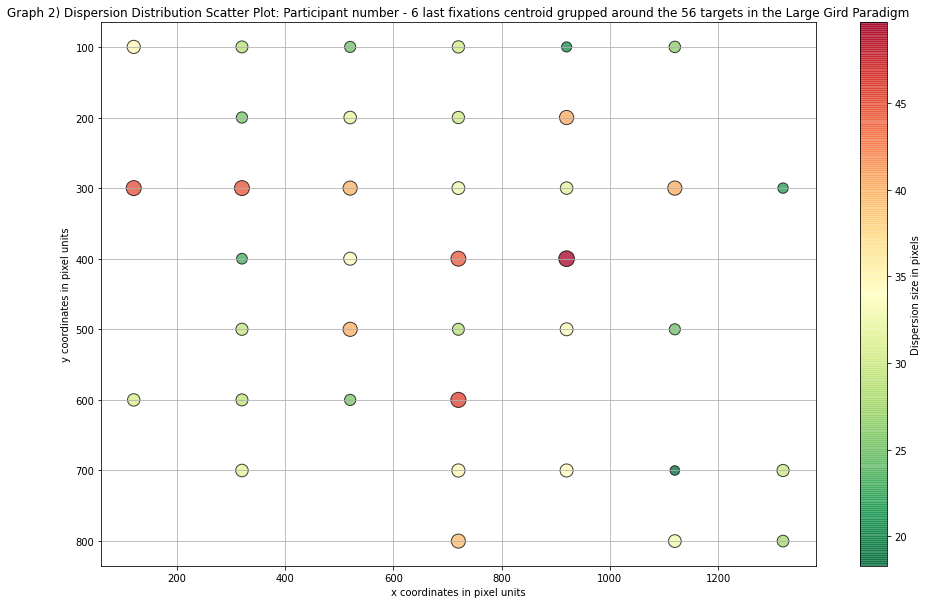

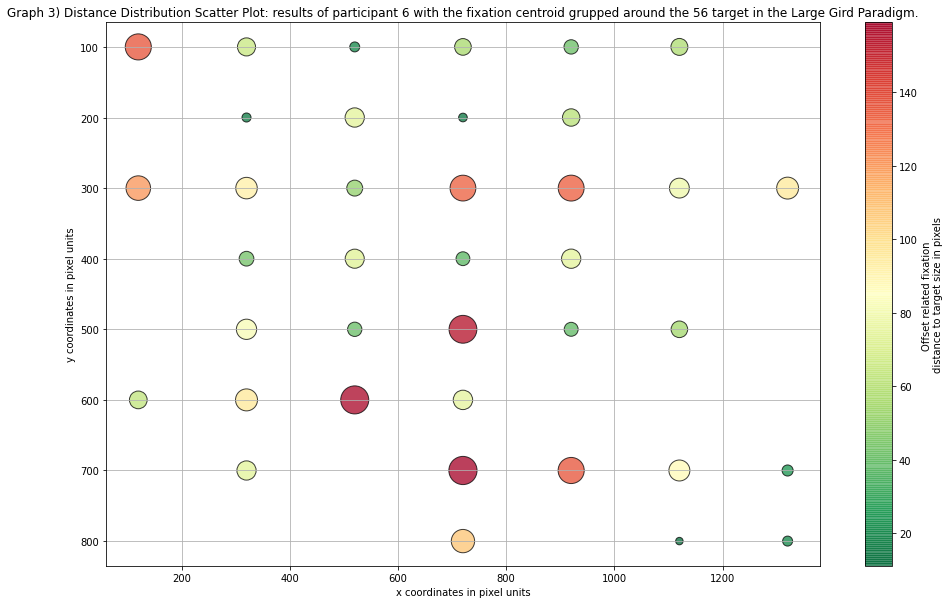

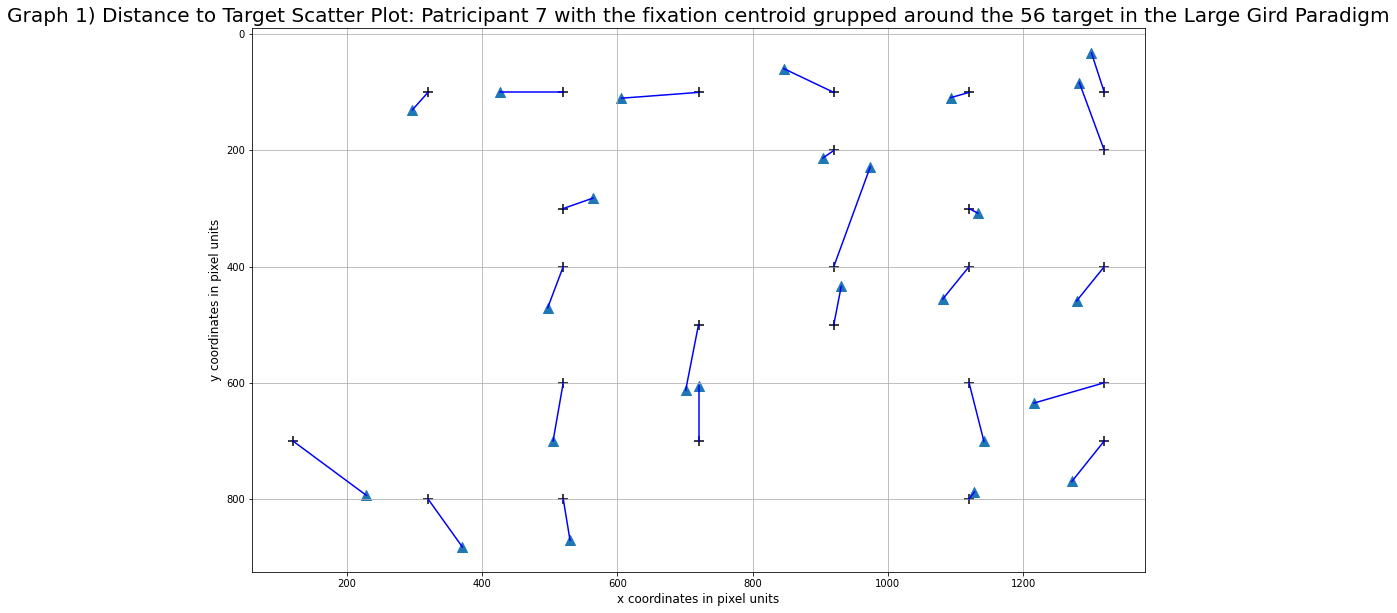

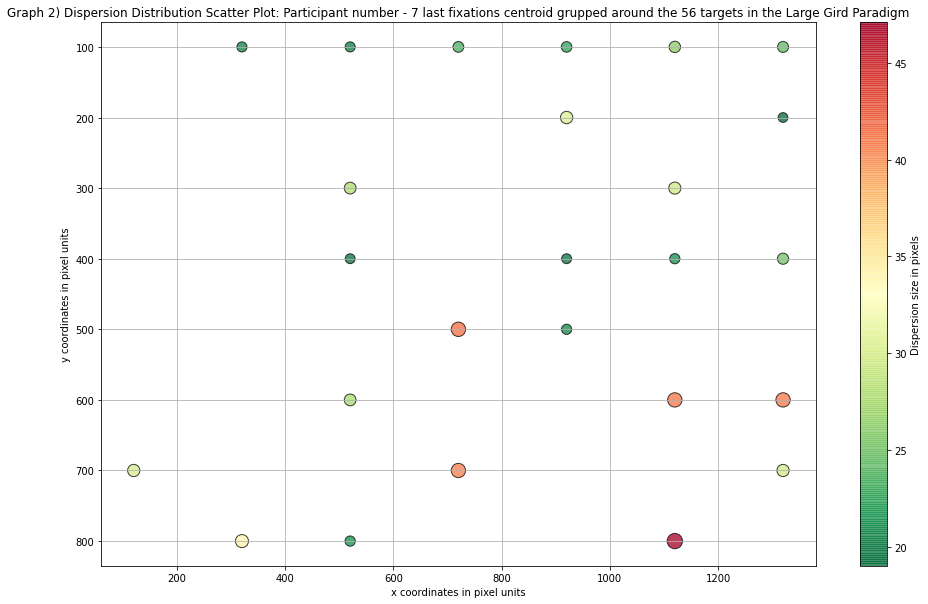

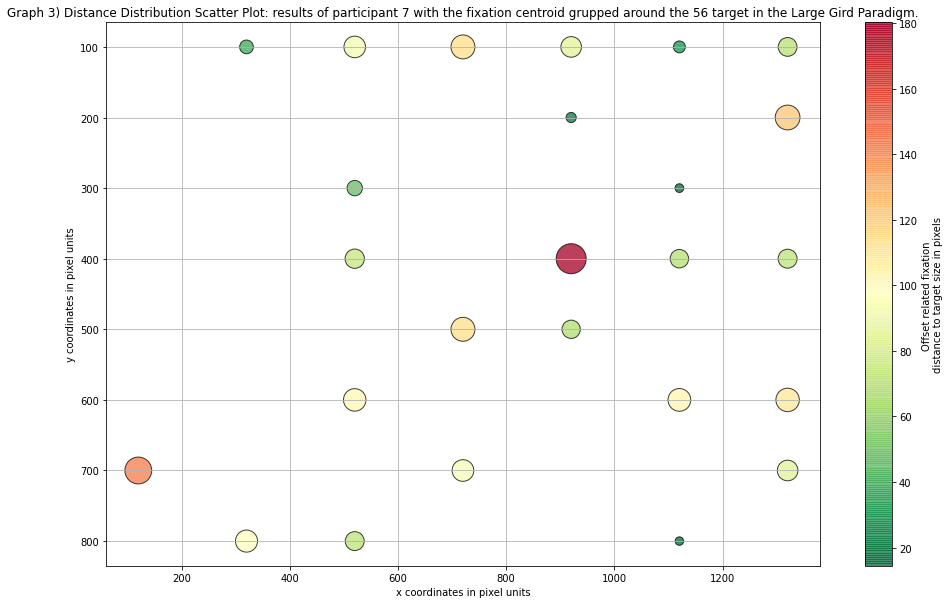

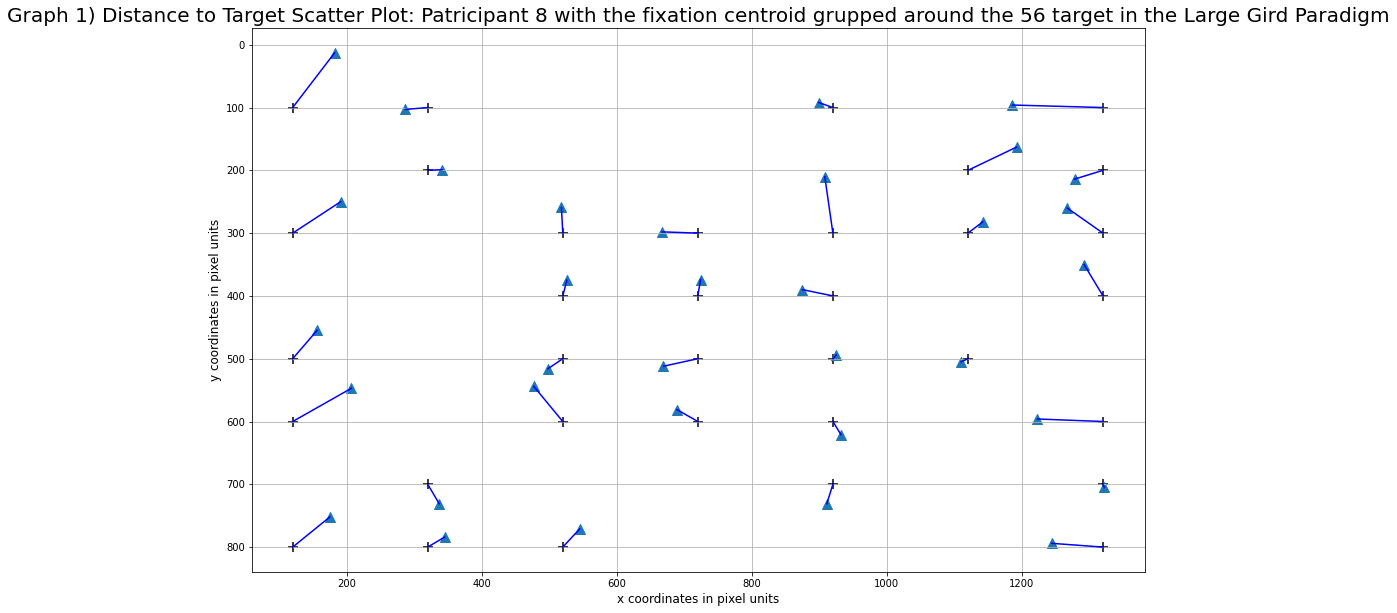

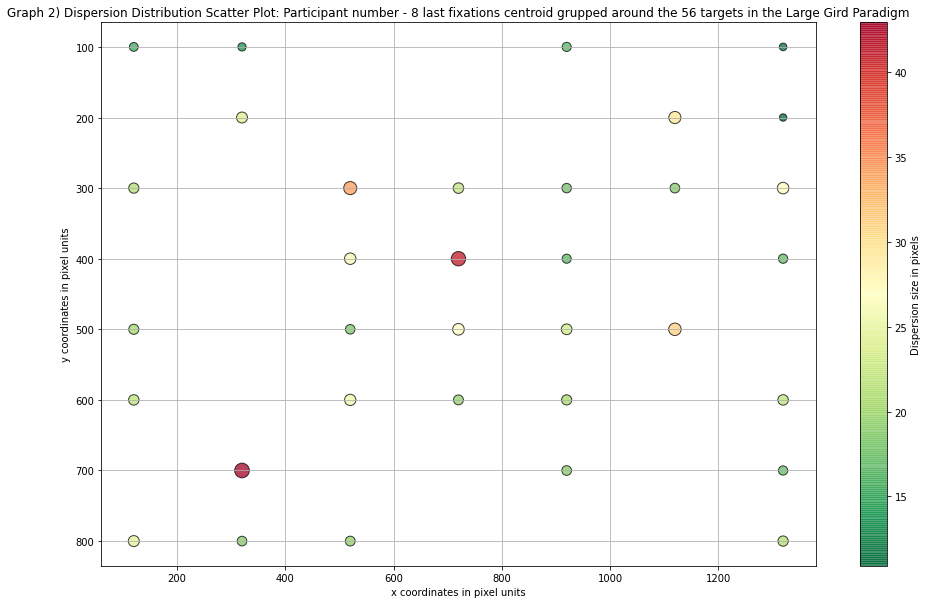

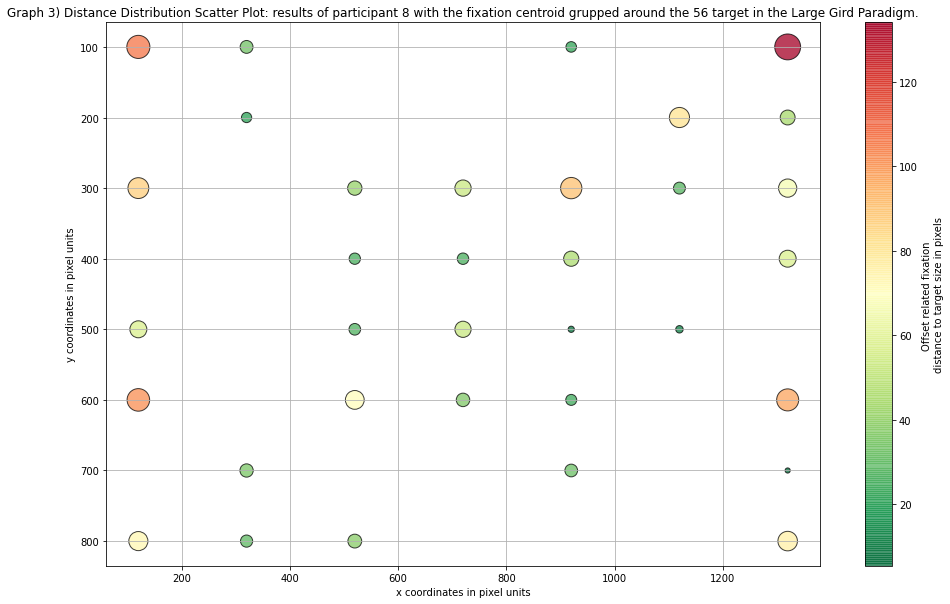

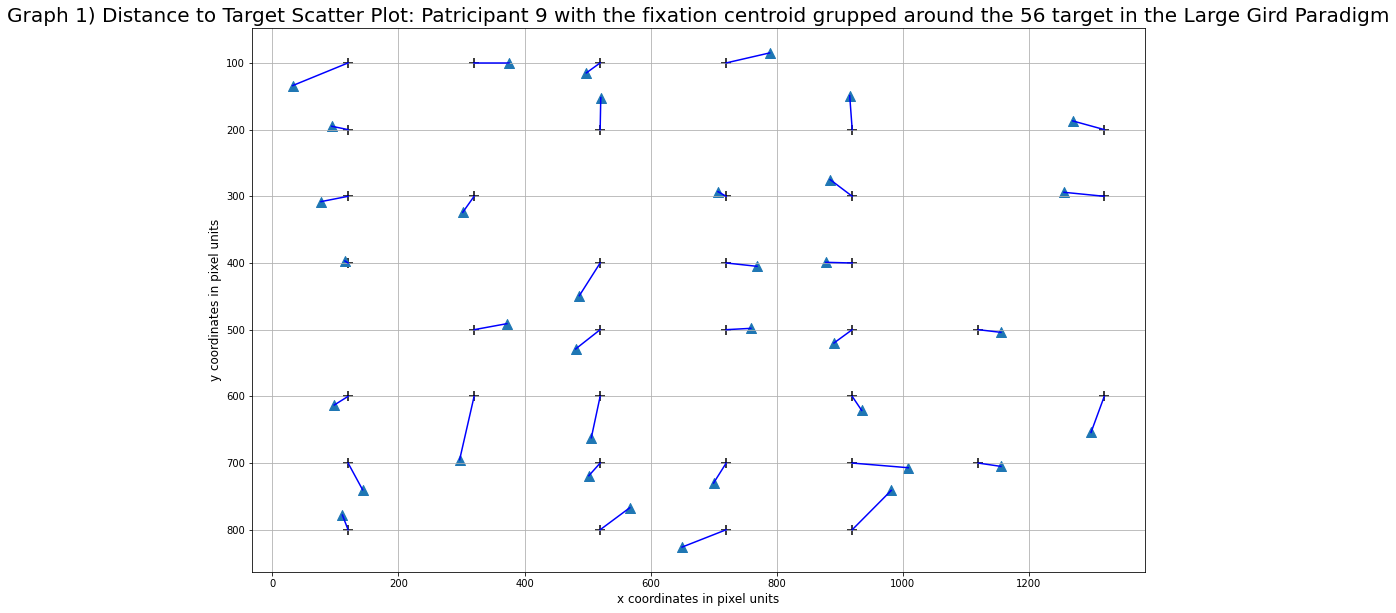

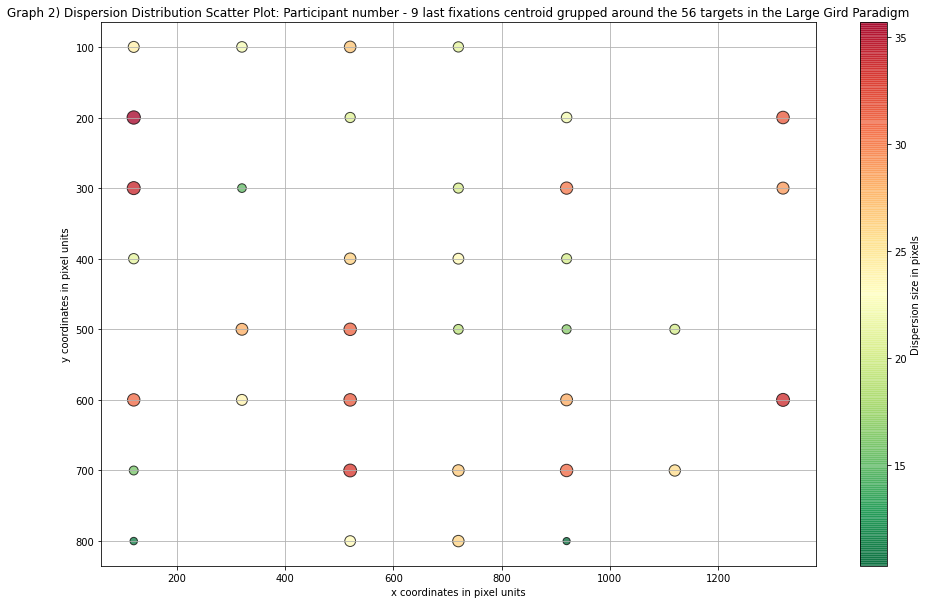

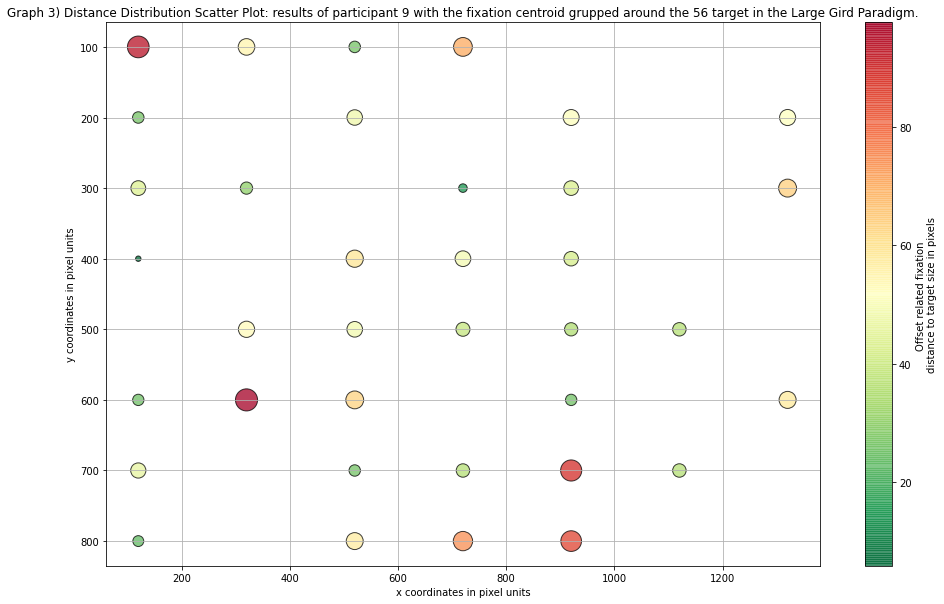

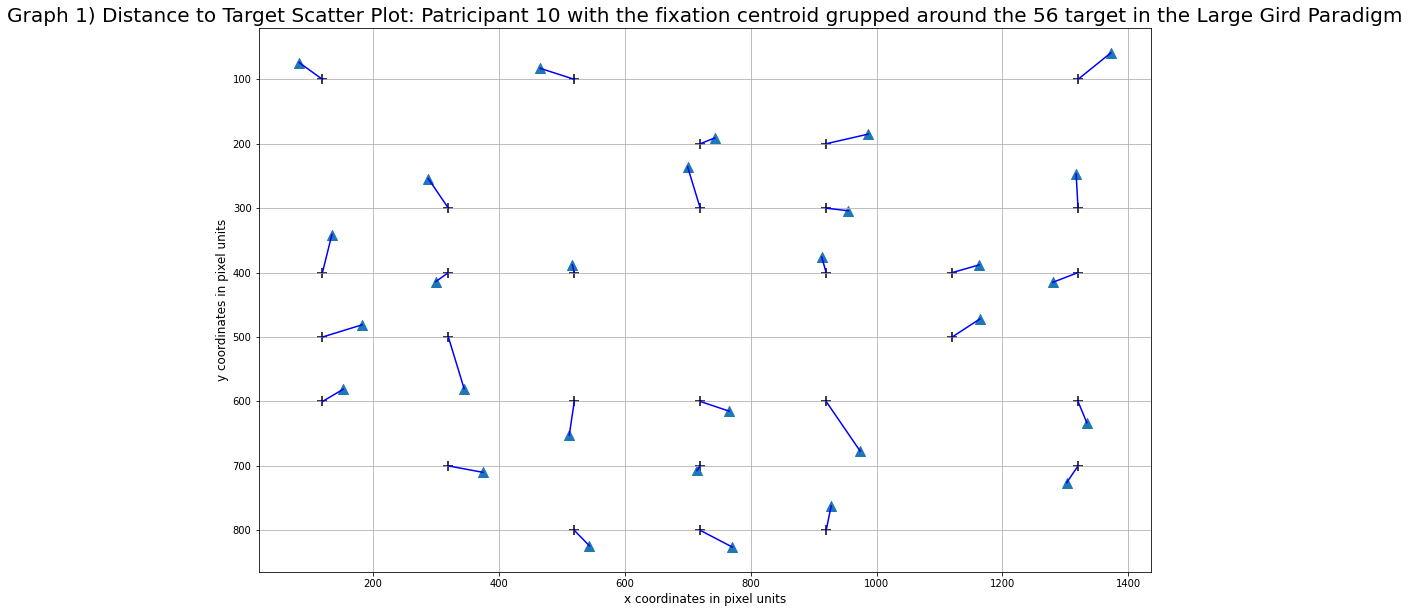

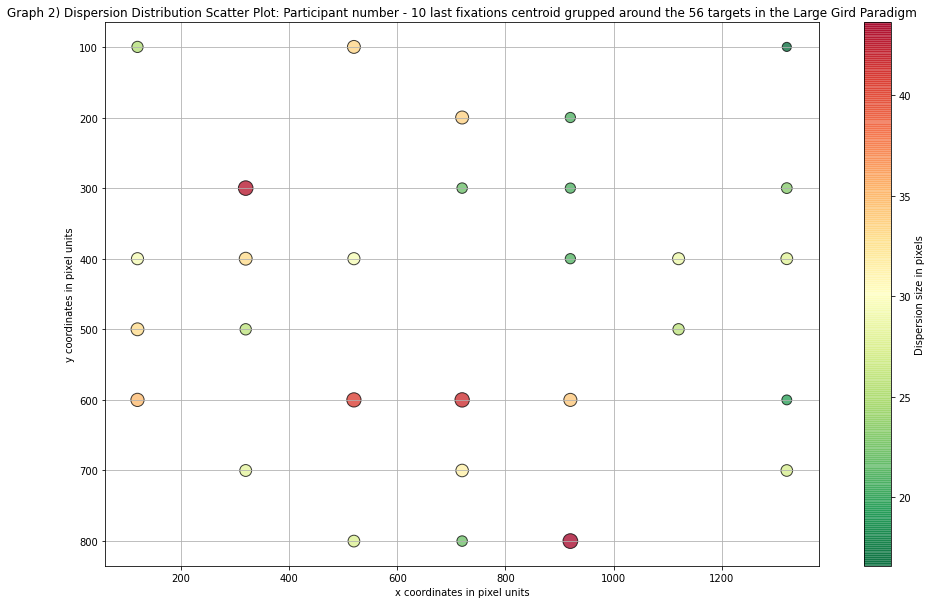

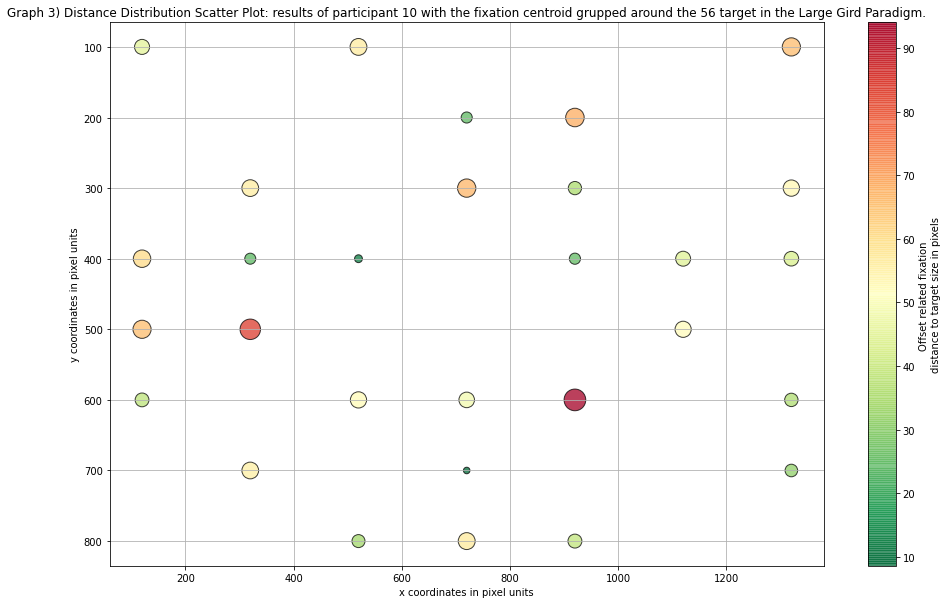

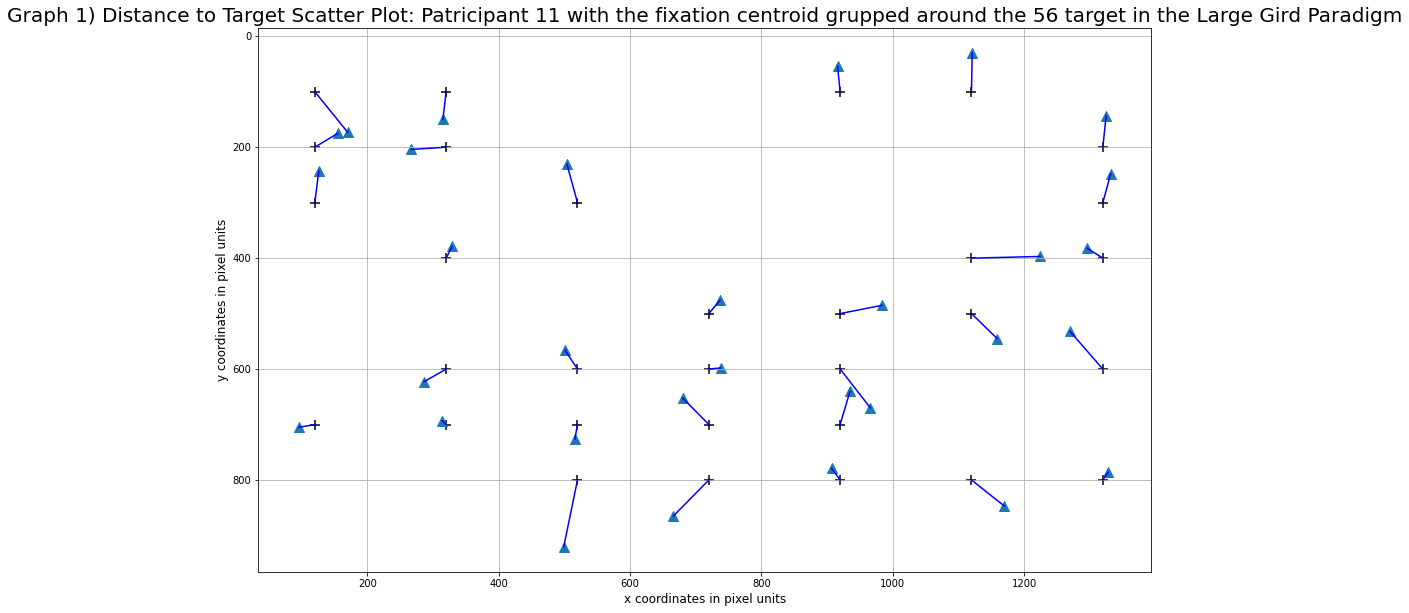

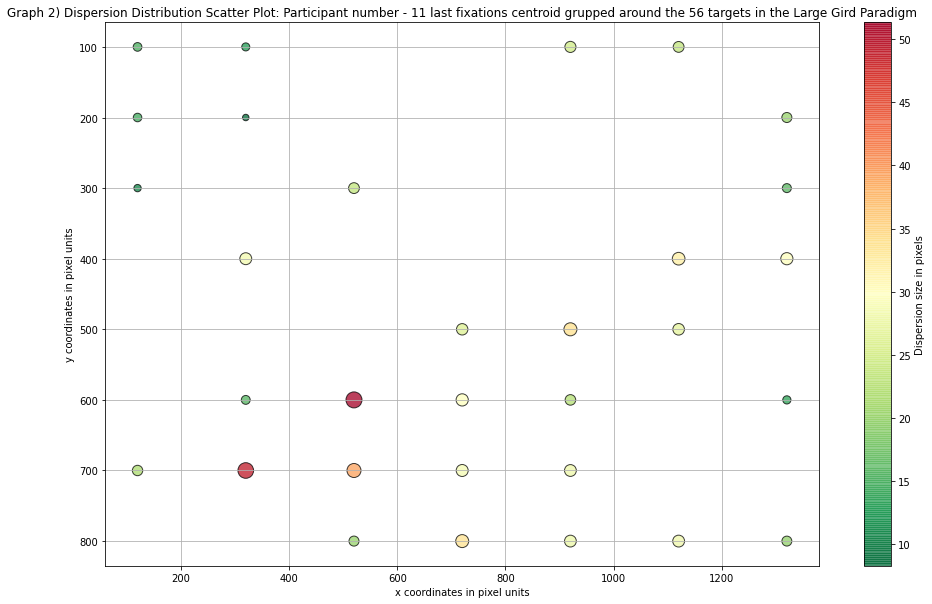

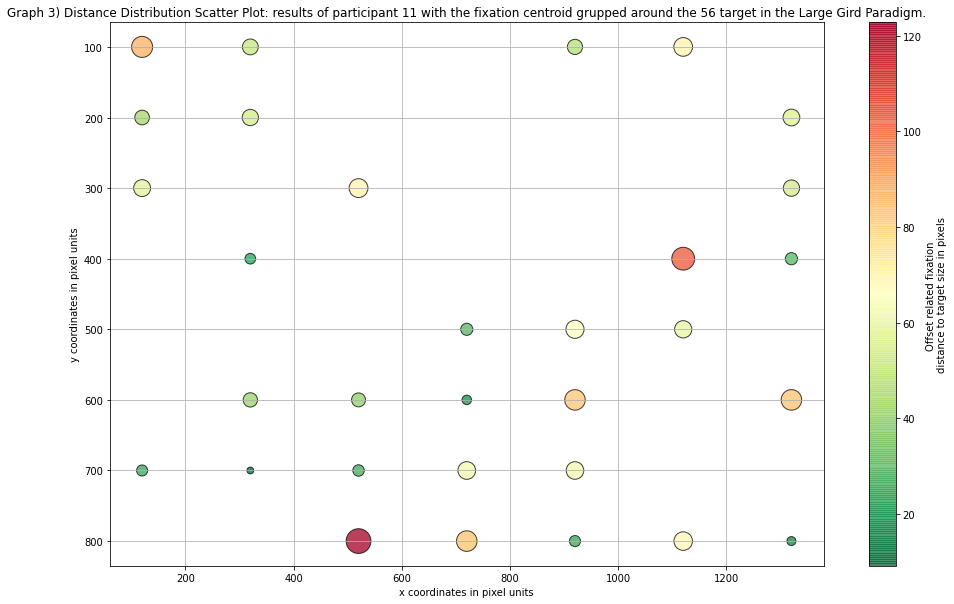

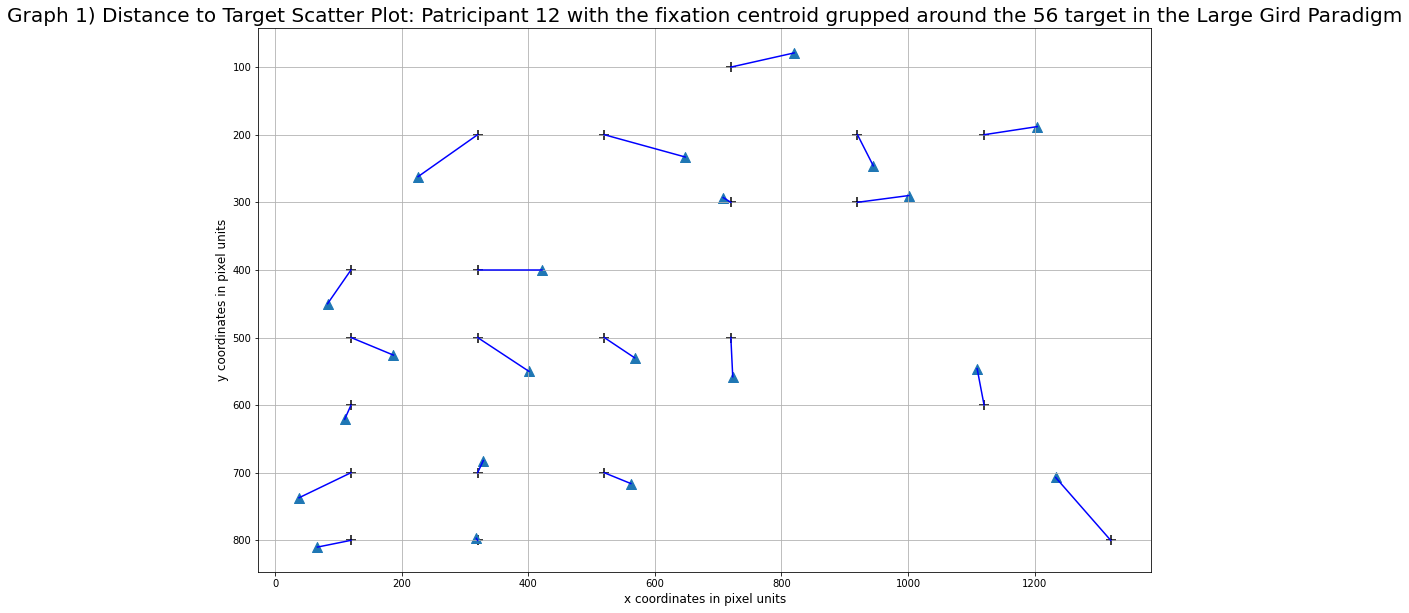

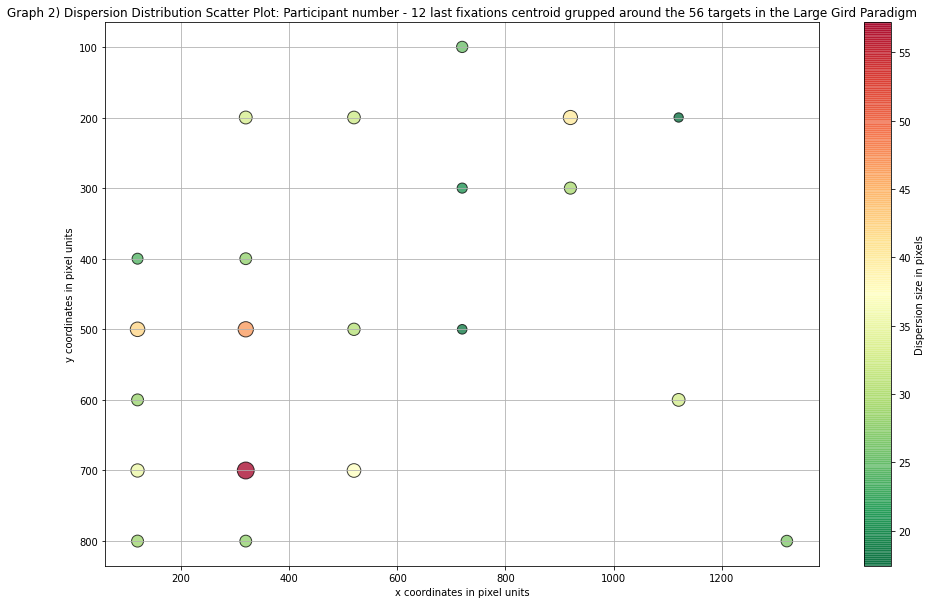

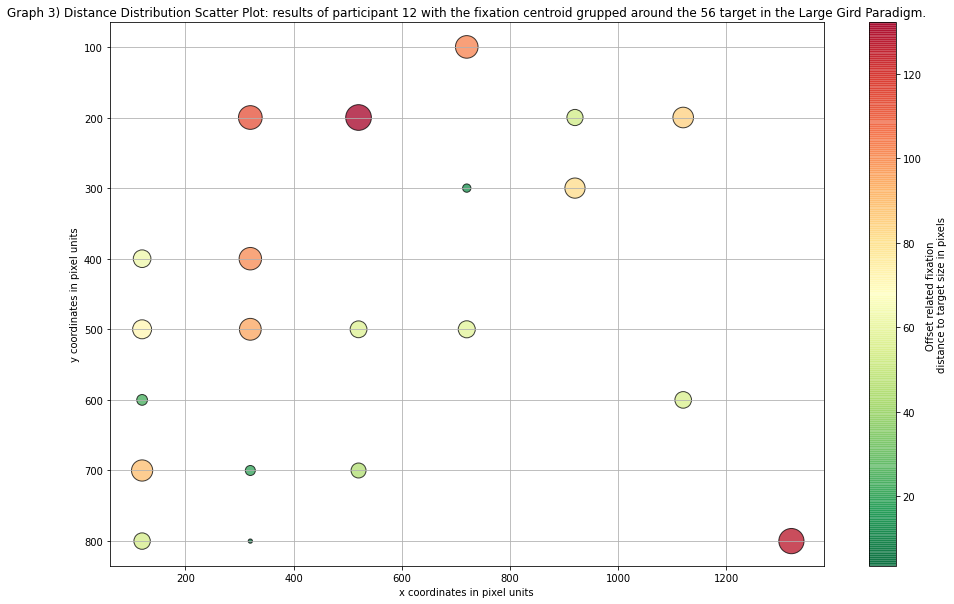

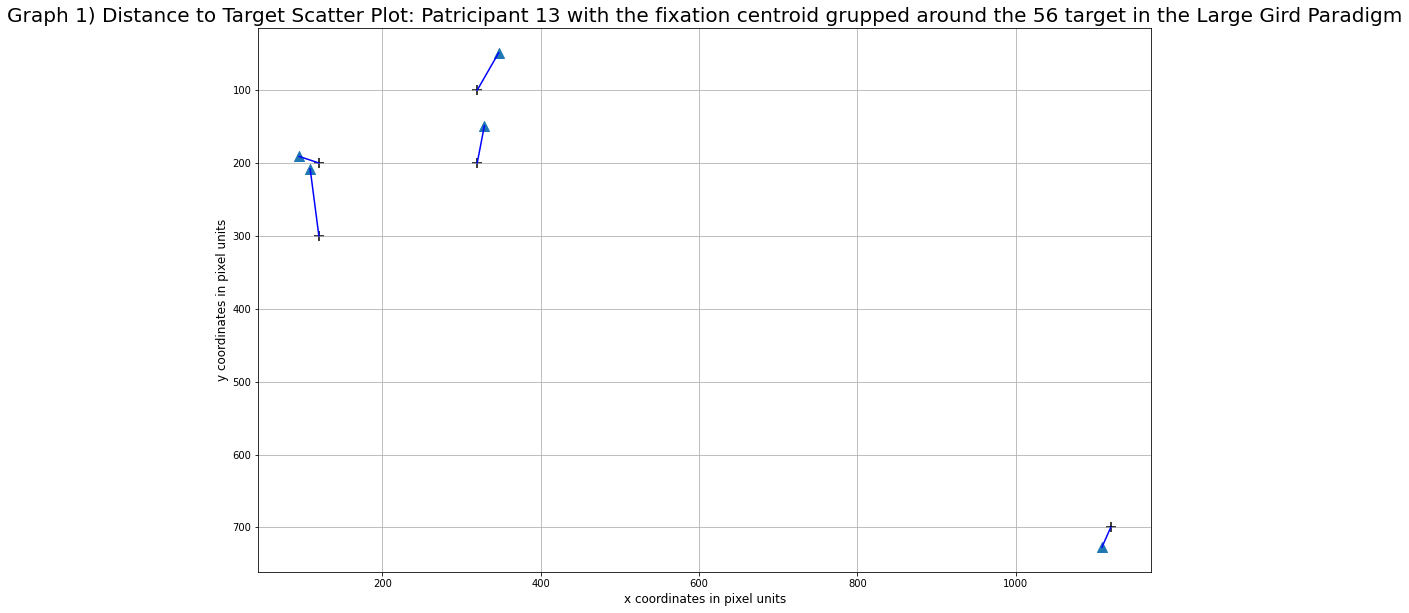

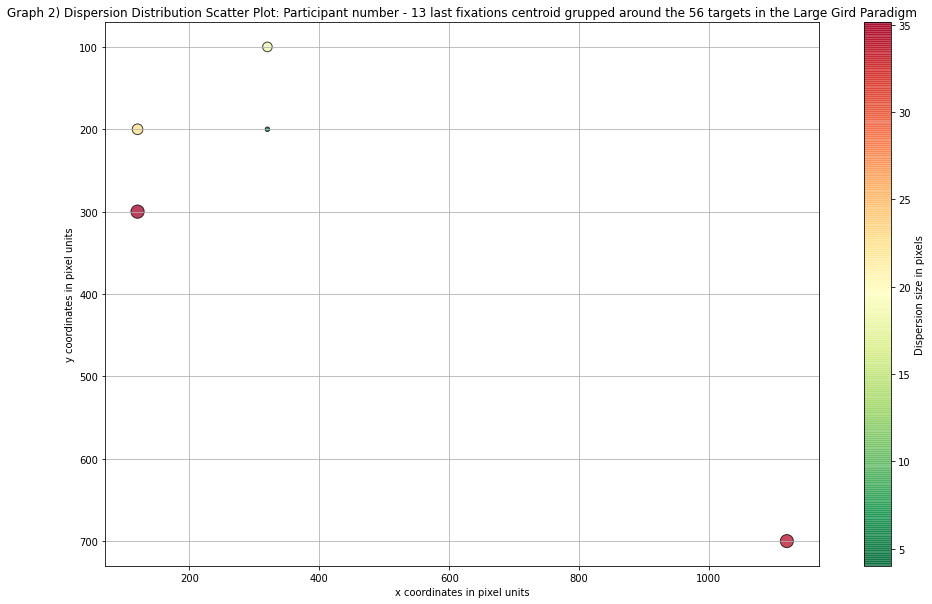

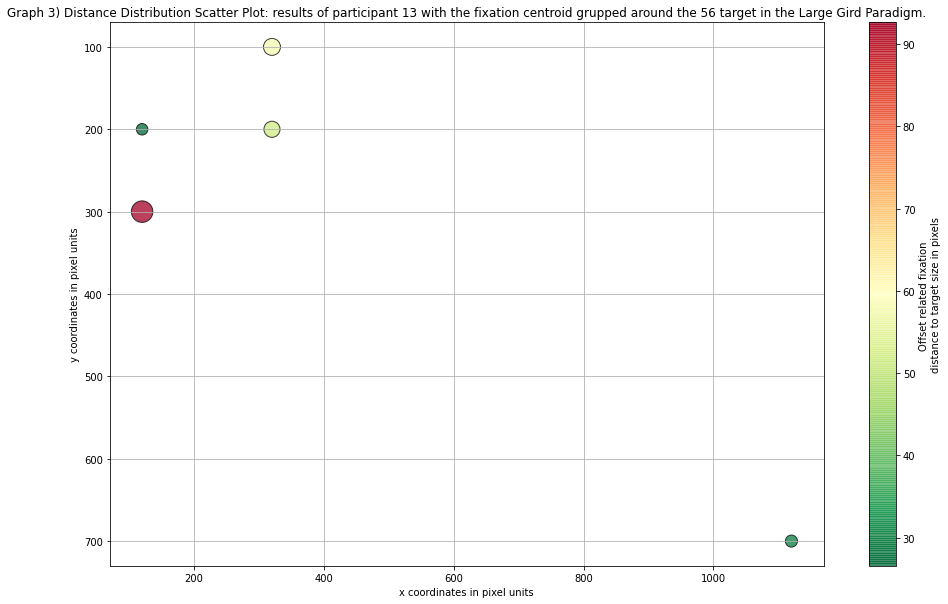

In [3]:

for i in range(3,counter):
    df_lb = pd.read_csv('../data/lb_data/fixations_data/p' + str(i) + '_fixations.csv')
    df_lb_trial = pd.read_csv('../data/lb_data/lb_trial_pp/p' + str(i) + '_trial_pp.csv')
    # df_lb_trial = pd.read_csv('../data/lb_data/trial_data/p' + str(i) + '_trials.csv')
    
    
    # format whole data
    df_lb = math_calc.formating_timeseries(df_lb)
    df_lb_trial = math_calc.formating_trials(df_lb_trial)
    # Calculate the offset-fixations
    df_offsetFix = math_calc.calcOffsetFixation(tracker_type,df_lb_trial, df_lb)
    # Caluclate The Euclidan Distance
    df_offsetFix = math_calc.calcEuclideanDistance(df_offsetFix, df_lb_trial)
    # Add to the dataframe column with participant number:
    df_offsetFix = math_calc.addParticipantNumberCol(i, df_offsetFix)

    #Plot distance to target and Dispersion
    plots.distanceToTargetPlot(tracker_type, i, df_lb_trial, df_offsetFix)
    plots.dispersionGridScatter(tracker_type, i, df_lb_trial, df_offsetFix)
    plots.precisionScatterScatter(tracker_type, i, df_lb_trial, df_offsetFix)

    df_offsetFix.to_csv('../data/lb_data/last_fixation_data/' + str(i) + '_lb_fix.csv', index = False)
    df_lb_trial.to_csv('../data/lb_data/lb_trial_pp/p' + str(i) + '_trial_pp.csv', index = False)